In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Exploring COPA Cases "by complainant"

In [2]:
comdata = pd.read_csv("../data/raw/Complaints/COPA_Cases_-_By_Complainant_or_Subject.csv", \
                   dtype={"LOG_NO":str,"CASE_TYPE":str}) \
        .assign(DATETIME = lambda x: pd.to_datetime(x.COMPLAINT_DATE, format = "%m/%d/%Y %H:%M:%S %p")) \
        .assign(ROWIDX = lambda x: np.arange(len(x)))
comdata['LOG_NO'] = comdata['LOG_NO'].astype(str)
comdata.drop_duplicates(inplace = True)

## Exploring Dates

### Observations
* There is a noticeable downward trend in complaints over the decade. 
* The majority of cases are assigned internally.

### Conclusions 
* Assignment may be an important feature. MUST read up on why cases are assigned where!
* Date and time of day aren't a-priori important imo.


In [28]:
comdata.columns

Index(['LOG_NO', 'COMPLAINT_DATE', 'ASSIGNMENT', 'CASE_TYPE', 'CURRENT_STATUS',
       'CURRENT_CATEGORY', 'FINDING_CODE', 'POLICE_SHOOTING', 'BEAT',
       'RACE_OF_COMPLAINANT', 'SEX_OF_COMPLAINANT', 'AGE_OF_COMPLAINANT',
       'COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH', 'DATETIME',
       'ROWIDX'],
      dtype='object')

[Text(0.5, 1.0, 'Frequency of Complaints')]

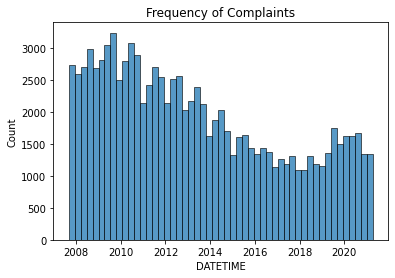

In [26]:
g = sns.histplot(comdata['DATETIME'])
g.set(title = "Frequency of Complaints")

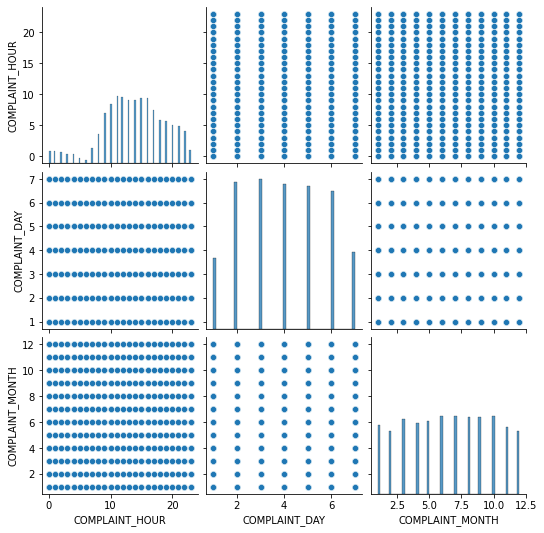

In [5]:
sns.pairplot(data=comdata, vars = ['COMPLAINT_HOUR','COMPLAINT_DAY','COMPLAINT_MONTH'])

## Exploring Case Info

### Observations
* Huge class imbalance in police shootings
* Loong tail in finding code 

### Conclusions
* Keep shootings, finding code, current category, assignment, case type
* Should break finding code and current cateogry into a bag (how to do this? one hot encode?)
* Maybe don't need to keep current status (or change it to disciplined or not?)

<AxesSubplot:xlabel='POLICE_SHOOTING', ylabel='count'>

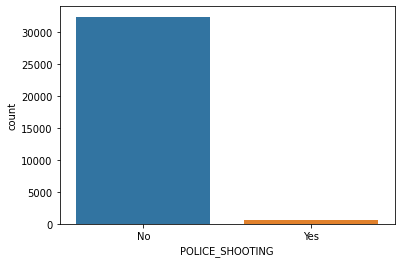

In [6]:
sns.countplot(data=comdata,x='POLICE_SHOOTING')

In [7]:
comdata.groupby(by='FINDING_CODE').size().sort_values(ascending=False).head()

FINDING_CODE
No Finding       10168
No Affidavit      9970
Not Sustained     6532
Unfounded         2487
Sustained         1332
dtype: int64

In [8]:
comdata.groupby(by='CURRENT_CATEGORY').size().sort_values(ascending=False).head()

CURRENT_CATEGORY
Excessive Force                     13820
Taser Discharge                      4763
Verbal Abuse                         1986
Unnecessary Display of Weapon        1781
Fourth Amendment/Improper Search     1239
dtype: int64

<AxesSubplot:xlabel='count', ylabel='CURRENT_STATUS'>

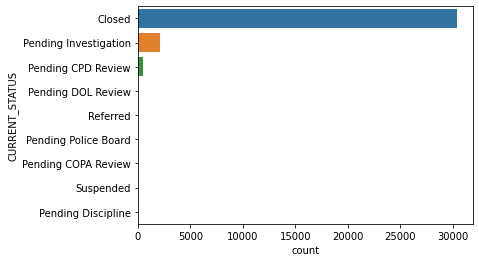

In [10]:
sns.countplot(data=comdata, y="CURRENT_STATUS", orient='h')

<AxesSubplot:xlabel='ASSIGNMENT', ylabel='count'>

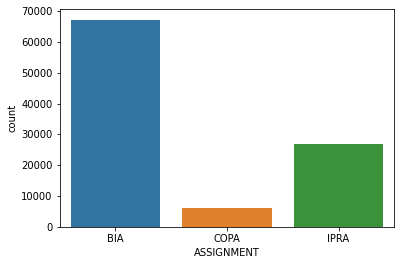

In [11]:
sns.countplot(data=comdata, x="ASSIGNMENT")

<AxesSubplot:xlabel='CASE_TYPE', ylabel='count'>

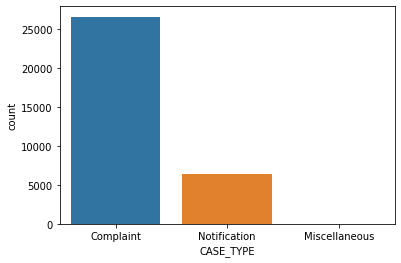

In [12]:
sns.countplot(data=comdata, x="CASE_TYPE")

## Exploring Complainant Info

### Observations
* Lots of nulls in police beat

### Conclusions
* Keep all the demographic categories (note also class imbalance)
* Keep beat (but may be redundant with complaint-officer dataset)

In [13]:
comdata.groupby(by='BEAT').size().sort_values(ascending=False).head()

BEAT
Unknown    805
1134       474
3100       404
2515       354
621        351
dtype: int64

RACE_OF_COMPLAINANT
Black or African American                    21392
Hispanic, Latino, or Spanish Origin           4256
White                                         3092
Unknown                                       2462
Asian or Pacific Islander                      177
American Indian or Alaska Native                30
Hispanic, Latino, or Spanish origin             23
Some Other Race, Ethnicity, or Origin           21
Middle Eastern or North African                  9
Prefer Not to Say                                9
Native Hawaiian or Other Pacific Islander        3
dtype: int64

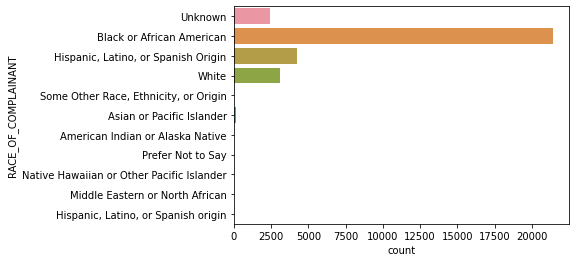

In [14]:
sns.countplot(data=comdata, y='RACE_OF_COMPLAINANT')
comdata.groupby(by='RACE_OF_COMPLAINANT').size().sort_values(ascending=False)

SEX_OF_COMPLAINANT
Male                         21489
Female                        8230
Unknown                       1738
Non-Binary / Third Gender       11
Prefer to Self-Describe          4
Prefer Not to Say                1
Prefer not to say                1
dtype: int64

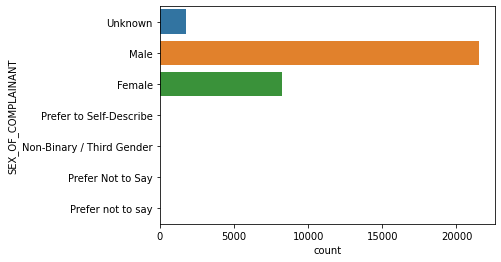

In [15]:
sns.countplot(data=comdata, y='SEX_OF_COMPLAINANT')
comdata.groupby(by='SEX_OF_COMPLAINANT').size().sort_values(ascending=False)

AGE_OF_COMPLAINANT
0-19       4997
20-29      9415
30-39      6369
40-49      3759
50-59      1762
60-69       459
70+         157
70-79        12
80-89         6
90+           1
Unknown    4537
dtype: int64

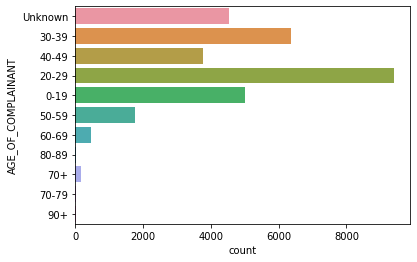

In [16]:
sns.countplot(data=comdata, y='AGE_OF_COMPLAINANT')
comdata.groupby(by='AGE_OF_COMPLAINANT').size()

## Exploring COPA Cases "by officer"

### Observations
* ~6000 rows are updates to existing complaints


In [17]:
offdata = pd.read_csv("../data/raw/Complaints/COPA_Cases_-_By_Involved_Officer.csv", \
                      dtype={"LOG_NO":str, "CASE_TYPE":str}) \
            .assign(DATETIME = lambda x: pd.to_datetime(x.COMPLAINT_DATE, format = "%m/%d/%Y %H:%M:%S %p"))
offdata['LOG_NO'] = offdata['LOG_NO'].astype(str)
offdata.drop_duplicates(inplace=True)

/Users/eric/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
offdata.columns

Index(['LOG_NO', 'COMPLAINT_DATE', 'ASSIGNMENT', 'CASE_TYPE', 'CURRENT_STATUS',
       'CURRENT_CATEGORY', 'FINDING_CODE', 'POLICE_SHOOTING', 'BEAT',
       'RACE_OF_INVOLVED_OFFICER', 'SEX_OF_INVOLVED_OFFICER',
       'AGE_OF_INVOLVED_OFFICER', 'YEARS_ON_FORCE_OF_INVOLVED_OFFICER',
       'COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH', 'DATETIME'],
      dtype='object')

RACE_OF_INVOLVED_OFFICER
White                                        15455
Hispanic, Latino, or Spanish Origin           7914
Black or African American                     7212
Unknown                                       1350
Asian or Pacific Islander                      918
American Indian or Alaska Native               123
Middle Eastern or North African                  2
Native Hawaiian or Other Pacific Islander        1
dtype: int64

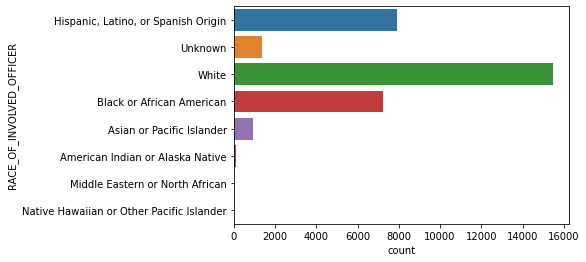

In [19]:
sns.countplot(data=offdata, y='RACE_OF_INVOLVED_OFFICER')
offdata.groupby(by='RACE_OF_INVOLVED_OFFICER').size().sort_values(ascending=False)

SEX_OF_INVOLVED_OFFICER
Male                         27758
Female                        3999
Unknown                       1204
Prefer not to say               11
Non-Binary / Third Gender        3
dtype: int64

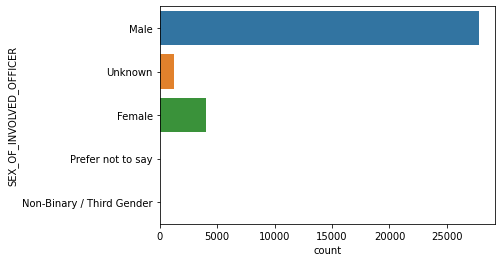

In [20]:
sns.countplot(data=offdata, y='SEX_OF_INVOLVED_OFFICER')
offdata.groupby(by='SEX_OF_INVOLVED_OFFICER').size().sort_values(ascending=False)

AGE_OF_INVOLVED_OFFICER
30-39      13074
40-49       9222
20-29       4273
50-59       3267
Unknown     2817
60-69        288
70-79         25
70+            5
80-89          3
0-19           1
dtype: int64

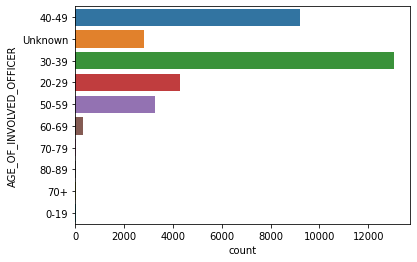

In [21]:
sns.countplot(data=offdata, y='AGE_OF_INVOLVED_OFFICER')
offdata.groupby(by='AGE_OF_INVOLVED_OFFICER').size().sort_values(ascending=False)

YEARS_ON_FORCE_OF_INVOLVED_OFFICER
0-4        8030
5-9        8013
10-14      6392
15-19      4557
20-24      2755
Unknown    1663
25-29      1226
30+         339
dtype: int64

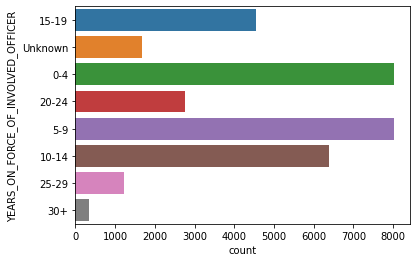

In [22]:
sns.countplot(data=offdata, y='YEARS_ON_FORCE_OF_INVOLVED_OFFICER')
offdata.groupby(by='YEARS_ON_FORCE_OF_INVOLVED_OFFICER').size().sort_values(ascending=False)

## Exploring Join of "by complainant" and "by officer" data


In [23]:
commonlog = comdata.merge(offdata, on = 'LOG_NO', how='inner', suffixes= ['.byc', '.byo'])
commonall = comdata.merge(offdata, how='inner', suffixes= ['.byc', '.byo'])

In [24]:
commonlog.columns

Index(['LOG_NO', 'COMPLAINT_DATE.byc', 'ASSIGNMENT.byc', 'CASE_TYPE.byc',
       'CURRENT_STATUS.byc', 'CURRENT_CATEGORY.byc', 'FINDING_CODE.byc',
       'POLICE_SHOOTING.byc', 'BEAT.byc', 'RACE_OF_COMPLAINANT',
       'SEX_OF_COMPLAINANT', 'AGE_OF_COMPLAINANT', 'COMPLAINT_HOUR.byc',
       'COMPLAINT_DAY.byc', 'COMPLAINT_MONTH.byc', 'DATETIME.byc', 'ROWIDX',
       'COMPLAINT_DATE.byo', 'ASSIGNMENT.byo', 'CASE_TYPE.byo',
       'CURRENT_STATUS.byo', 'CURRENT_CATEGORY.byo', 'FINDING_CODE.byo',
       'POLICE_SHOOTING.byo', 'BEAT.byo', 'RACE_OF_INVOLVED_OFFICER',
       'SEX_OF_INVOLVED_OFFICER', 'AGE_OF_INVOLVED_OFFICER',
       'YEARS_ON_FORCE_OF_INVOLVED_OFFICER', 'COMPLAINT_HOUR.byo',
       'COMPLAINT_DAY.byo', 'COMPLAINT_MONTH.byo', 'DATETIME.byo'],
      dtype='object')

In [25]:
dup_logs = commonlog.groupby(by='LOG_NO').size().loc[lambda x: x > 1]
dup_logs

LOG_NO
1008901         2
1008909         2
1008927         2
1008928         6
1008936         2
               ..
2021-0001389    2
2021-0001393    2
2021-0001404    3
2021-0001410    2
2021-0001411    2
Length: 9359, dtype: int64

In [ ]:
dup_logs = comdata.groupby(by='LOG_NO').size().loc[lambda x: x > 1]
comdata.set_index('LOG_NO')
dup_data = data[data.LOG_NO.isin(dup_logs.index)]
dup_logs

In [ ]:
dup_data.loc[dup_data.LOG_NO == '1008928', :]

In [ ]:
pred = pd.DataFrame({"urace" : dup_data.RACE_OF_COMPLAINANT == 'Unknown', \
                 "usex" : dup_data.SEX_OF_COMPLAINANT == 'Unknown', \
                 "uage" : dup_data.AGE_OF_COMPLAINANT == 'Unknown'})
notpred = pd.DataFrame({"urace" : dup_data.RACE_OF_COMPLAINANT != 'Unknown', \
                 "usex" : dup_data.SEX_OF_COMPLAINANT != 'Unknown', \
                 "uage" : dup_data.AGE_OF_COMPLAINANT != 'Unknown'})
un_data = dup_data.loc[pred.any(axis='columns')]
kn_data = dup_data.loc[notpred.all(axis='columns')]
dup_un_rows = kn_data.merge(un_data, on = 'LOG_NO', how='inner', suffixes= ['.kn', '.un']).filter('ROWIDX')
known_data = data[data.LOG_NO.isin(dup_un_rows)]
known_data

In [ ]:
data_dedupe.shape

In [ ]:
offdata.shape

In [ ]:
108365 - 106262

In [29]:
offdata.columns

Index(['LOG_NO', 'COMPLAINT_DATE', 'ASSIGNMENT', 'CASE_TYPE', 'CURRENT_STATUS',
       'CURRENT_CATEGORY', 'FINDING_CODE', 'POLICE_SHOOTING', 'BEAT',
       'RACE_OF_INVOLVED_OFFICER', 'SEX_OF_INVOLVED_OFFICER',
       'AGE_OF_INVOLVED_OFFICER', 'YEARS_ON_FORCE_OF_INVOLVED_OFFICER',
       'COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH', 'DATETIME'],
      dtype='object')